# Linear regression on true hits

In [1]:
import numpy as np
from matplotlib import pylab as plt

In [2]:
import src.operate_datasets    as operate_datasets
import src.model_visualisation as model_visualisation
import src.model_evaluation    as model_evaluation

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'true')

In [4]:
X_train, y_train, _, _ = operate_datasets.split_dataset(full_X, full_y)

In [5]:
# no clipping for true hits
#X_train, y_train = dataset_clip(X_train, y_train, min_clip)

In [6]:
X_train

array([[   2,  243],
       [   0,    0],
       [   0,  270],
       ...,
       [   4,  302],
       [   1,   56],
       [   0, 3203]])

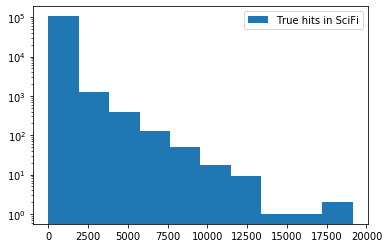

In [7]:
plt.hist(X_train[:,0], log=True, label='True hits in SciFi')
plt.legend()
plt.show()

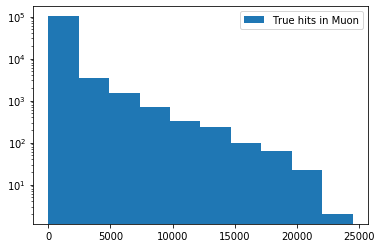

In [8]:
plt.hist(X_train[:,1], log=True, label='True hits in Muon')
plt.legend()
plt.show()

In [9]:
y_train.shape

(108000,)

## Fit regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg_l2 = LinearRegression().fit(X_train, y_train) # positive=True ??? (update sklearn)

score_l2 = reg_l2.score(X_train, y_train)
print('L2: ', score_l2)

y_pred_l2 = reg_l2.predict(X_train)

L2:  0.12725035172602284


## Visualise results

In [12]:
X_sum = X_train.sum(axis=1).reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [13]:
print('y = kx + b')
print('k', reg_l2.coef_)
print('b', reg_l2.intercept_)

y = kx + b
k [1.29514343e-05 3.94638099e-05]
b 0.17713838893054593


In [14]:
model_name = 'L2 on true hits'
save_file_prefix = model_name.replace(' ', '-')

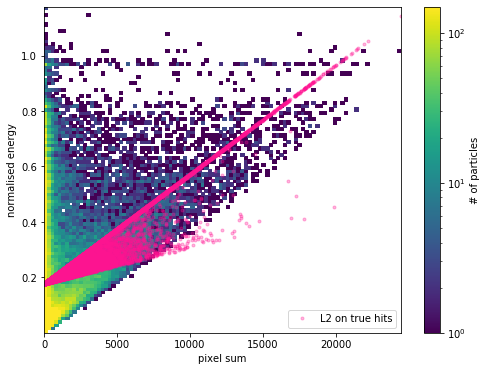

In [15]:
model_visualisation.plot_2d_energy_hist(X_sum, y_train, y_pred_l2, model_name,
                                        save_file_prefix = save_file_prefix)

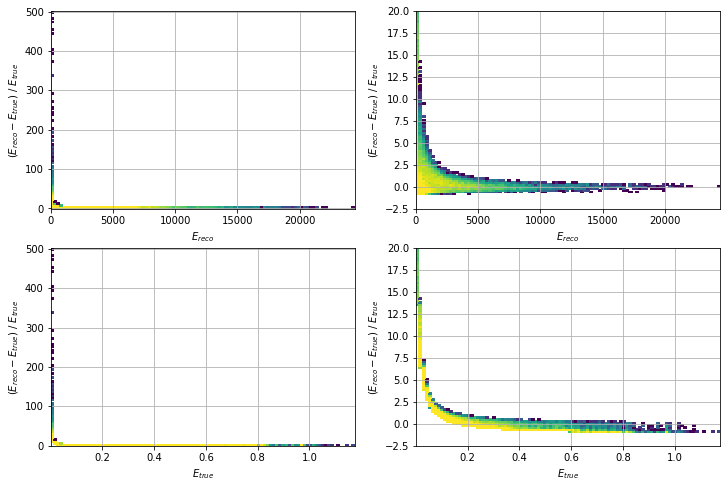

In [16]:
model_visualisation.plot_res_vs_energy(X_sum, y_train, y_pred_l2,
                                       save_file_prefix = save_file_prefix) 

mean   = 1.87237e+00
std    = 7.31989e+00
median = 3.61818e-01


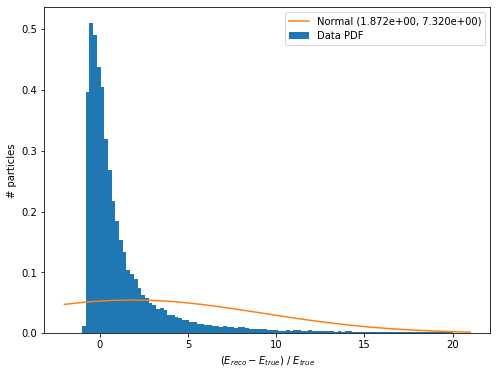

In [17]:
model_visualisation.plot_res_hist_fit(y_train, y_pred_l2, [-1,20],
                                      save_file_prefix = save_file_prefix)

In [18]:
model_evaluation.save_scores(y_train, y_pred_l2, save_file_prefix)

explained_variance_score 0.12725035172602284
max_error 0.9990695841297482
mean_absolute_error 0.12556765714489143
mean_squared_error 0.02792165907454648
median_absolute_error 0.10784797125798944
r2_score 0.12725035172602284


,L2-on-true-hits
explained_variance_score,0.127250
max_error,0.999070
mean_absolute_error,0.125568
mean_squared_error,0.027922
median_absolute_error,0.107848
r2_score,0.127250
avg_resolution,1.872374
std_resolution,7.319886
